# Info
Name:  

    KORUS_AOD_profile

Purpose:  

    Comparison of AOD from 4STAR over a profile
    Additional calculations of the aerosol extinction profile
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading OMI HDF5 files
    - matplotlib
    - numpy
    - scipy : for saving and reading
    - pytables
    - os
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - ...
  
Modification History:

    Written: Samuel LeBlanc, OSAN AFB, Korea, 2016-05-09
    Modified: 

# Import the required modules and set up base


In [1]:
%config InlineBackend.rc = {}
import matplotlib 
#matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import scipy.io as sio
import Sp_parameters as Sp
import tables
import load_utils as lm

In [2]:
from path_utils import getpath
fp = getpath('KORUS')

Return path named:  KORUS /mnt/c/Users/sleblanc/Research/KORUS-AQ/


In [3]:
%matplotlib notebook
#fp = 'C:/Users/sleblan2/Research/KORUS-AQ/'

In [4]:
from mpl_toolkits.basemap import Basemap,cm
from Sp_parameters import deriv, smooth

# Load the various data

## Load the 4STAR starsun


In [5]:
f_star = fp+'data\\20160501starsun.mat'

In [6]:
s = sio.loadmat(f_star)

TypeError: 'NoneType' object is not iterable

In [5]:
s.keys()

['Str',
 'tau_O3_err',
 'sza',
 'm_ray',
 'toggle',
 'pitch',
 'Tst',
 'fwhm',
 'nirt',
 'tau_aero_noscreening',
 'rateaero',
 'O3h',
 'NO2col',
 'Headng',
 'RH',
 'Pst',
 'nirheader',
 'sd_aero_crit',
 'dark',
 'nirVdettemp',
 'Elstep',
 'tau_ray',
 'nircols',
 'sunaz',
 'O3col',
 'nirfilen',
 'f',
 'tau_O4_err',
 't',
 'c0mod',
 'tau_tot_slant',
 'rate',
 'program_version',
 'sat_time',
 'm_O3',
 'visheader',
 'nirTint',
 'filename',
 'tau_r_err',
 'nirsat_pixel',
 'Md',
 'aeronetcols',
 'rateslant',
 'visAVG',
 'tau_NO2_err',
 'Zn',
 'AZstep',
 'darkstd',
 'QdVtot',
 'nirAVG',
 'w',
 'ELcorr',
 'visVdettemp_C',
 'El_deg',
 'skyresp',
 'Lon',
 'tau_aero',
 'AZ_deg',
 'visrow_labels',
 'm_H2O',
 'c0err',
 'viscols',
 'tau_CO2_CH4_N2O_abserr',
 'aerosolcols',
 'tau_O3',
 'vissat_pixel',
 'tau_O4',
 'tau_NO2',
 'tau_aero_polynomial',
 'ratetot',
 'visfilen',
 'c0',
 'Tprecon_C',
 'raw',
 '__header__',
 'rawcorr',
 'sat_ij',
 'sunel',
 'visTint',
 'Tbox_C',
 'QdVtb',
 'QdVlr',
 'nirVdett

In [6]:
s['utc'] = lm.toutc(lm.mat2py_time(s['t']))

## Get the flag file

In [11]:
s_flag = 'C:\\Users\\sleblan2\\Research\\4STAR_codes\\data_folder\\20160501_starflag_man_created20160503_2330by_JR.mat'

In [12]:
sf = sio.loadmat(s_flag)

In [14]:
sf.keys()

['unspecified_clouds',
 'manual_flags',
 'bad_aod',
 'flagfile',
 '__globals__',
 'frost',
 '__header__',
 'before_or_after_flight',
 'unspecified_aerosol',
 'hor_legs',
 'low_cloud',
 'smoke',
 'time',
 'dust',
 'vert_legs',
 '__version__',
 'cirrus']

In [15]:
sf['bad_aod']

array([[1],
       [1],
       [1],
       ..., 
       [1],
       [1],
       [1]], dtype=uint8)

In [25]:
ifl = sf['bad_aod']==0

In [32]:
ifl = ifl.flatten()

In [33]:
ifl.shape

(22791L,)

In [34]:
s['utc'].shape

(22791L,)

## Plot some early 4STAR data

<IPython.core.display.Javascript object>


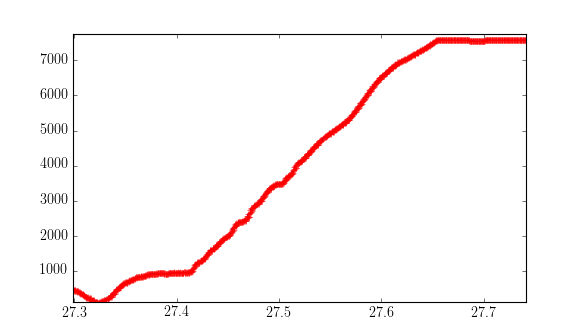

In [37]:
plt.figure()
plt.plot(s['utc'],s['Alt'])
plt.plot(s['utc'][ifl],s['Alt'][ifl],'+r')

<IPython.core.display.Javascript object>


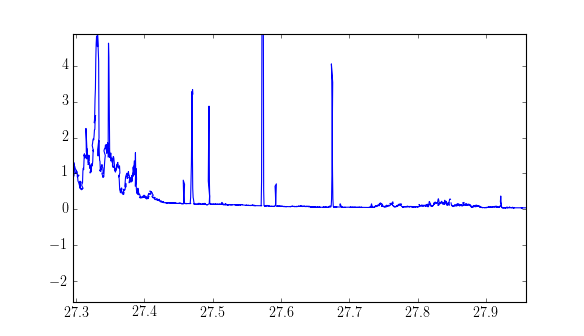

In [43]:
plt.figure()
plt.plot(s['utc'],s['tau_aero'][:,400])

<IPython.core.display.Javascript object>


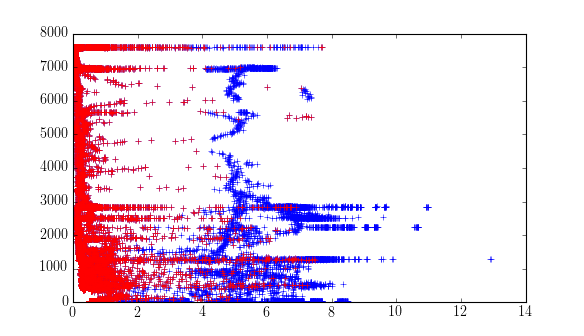

In [36]:
plt.figure()
plt.plot(s['tau_aero'][:,400],s['Alt'],'+')
plt.plot(s['tau_aero'][ifl,400],s['Alt'][ifl],'+r')


In [38]:
profile = [27.327,27.655]

In [58]:
it = (s['utc']>=profile[0]) & (s['utc']<=profile[1]) & (ifl) & (s['tau_aero'][:,400]<2.0)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [59]:
it = it.flatten()

# Plot the geographical region and add context

In [166]:
#set up a easy plotting function
def make_map(ax=plt.gca()):
    m = Basemap(projection='stere',lon_0=128,lat_0=36.0,
            llcrnrlon=123.0, llcrnrlat=33.5,
            urcrnrlon=132.0, urcrnrlat=39,resolution='h',ax=ax)
    m.drawcoastlines()
    #m.fillcontinents(color='#AAAAAA')
    m.drawstates()
    m.drawcountries()
    m.drawmeridians(np.linspace(123,133,11),labels=[0,0,0,1])
    m.drawparallels(np.linspace(33,39,13),labels=[1,0,0,0])
    return m


<IPython.core.display.Javascript object>


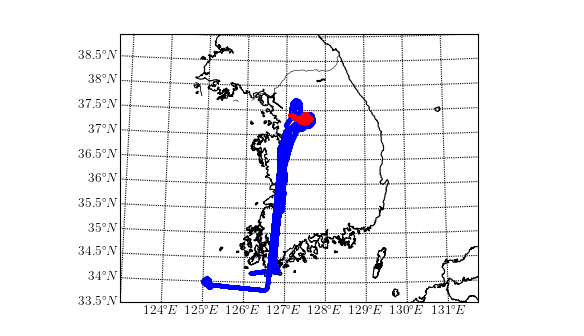

In [167]:
fig,ax = plt.subplots(1,1)
m = make_map(ax)
m.plot(s['Lon'],s['Lat'],'b.',latlon=True)
m.plot(s['Lon'][it],s['Lat'][it],'r+',latlon=True)
plt.savefig(fp+'plot\\map_take_off_profile_20160501.png',dpi=600,transparent=True)

# Now plot the vertical distribution of AOD and Extinction

## Vertical profile of AOD

In [46]:
i515 = np.argmin(abs(s['w']*1000.0-515.0))

In [62]:
ii = np.where(it)[0][0]

<IPython.core.display.Javascript object>


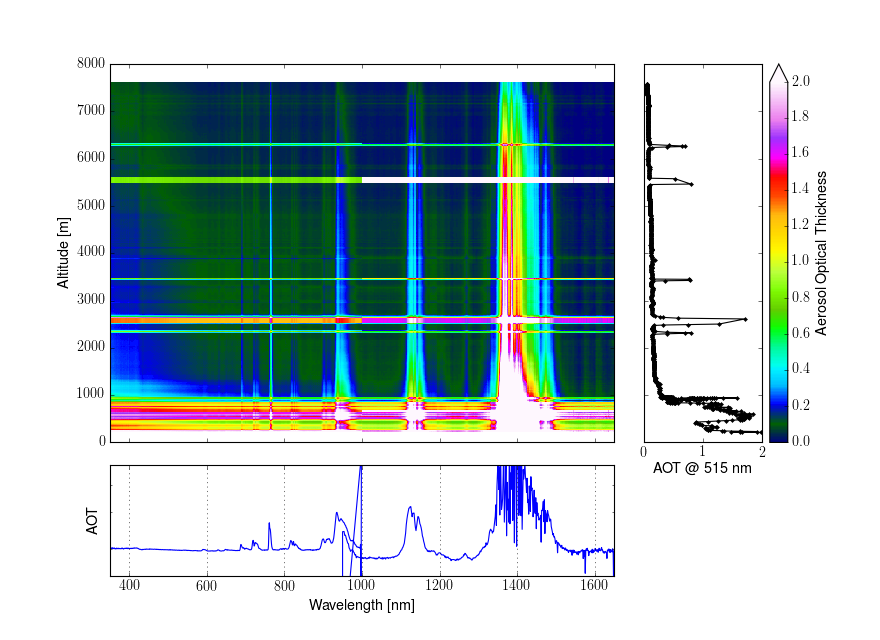

In [169]:
fig = plt.figure(figsize=(11,8))
ax = plt.subplot2grid((4,4),(0,0),colspan=3,rowspan=3)
cb = ax.pcolorfast(s['w'].flatten()*1000.0,s['Alt'][it].flatten(),s['tau_aero'][it,:][:-1,:-1],
                   cmap='gist_ncar',vmin=0,vmax=2.0)
ax2 = plt.subplot2grid((4,4),(0,3),sharey=ax,rowspan=3)
ax2.plot(s['tau_aero'][it,i515],s['Alt'][it],'k.-')
axc = plt.colorbar(cb,extend='max')
axc.set_label('Aerosol Optical Thickness')
ax.set_ylabel('Altitude [m]')
ax.set_ylim([0,8000])
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_xticks([0.0,1.0,2.0])
ax2.set_xlim([0.0,2.0])
ax2.set_xlabel('AOT @ 515 nm')

ax3 = plt.subplot2grid((4,4),(3,0),sharex=ax,colspan=3)
ax3.semilogy(s['w'].flatten()*1000.0,s['tau_aero'][ii,:].flatten())
ax.set_xlim([350,1650])
ax3.set_ylim([1.5,5.0])
ax3.grid()
ax3.set_xlabel('Wavelength [nm]')
ax3.set_ylabel('AOT')
plt.setp(ax.get_xticklabels(), visible=False)
plt.savefig(fp+'plot\\AOD_Alt_profile_20160501.png',dpi=600,transparent=True)

## Vertical profile of extinction

In [139]:
from Sp_parameters import deriv,smooth

In [82]:
s['ext'] = np.zeros_like(s['tau_aero'])

In [161]:
for l,w in enumerate(s['w'][0]):
    s['ext'][it,l] = smooth(deriv(smooth(s['tau_aero'][it,l],3,nan=False,old=True),
                                  s['Alt'][it][:,0])*-1000000.0,5,nan=False,old=True)

<IPython.core.display.Javascript object>


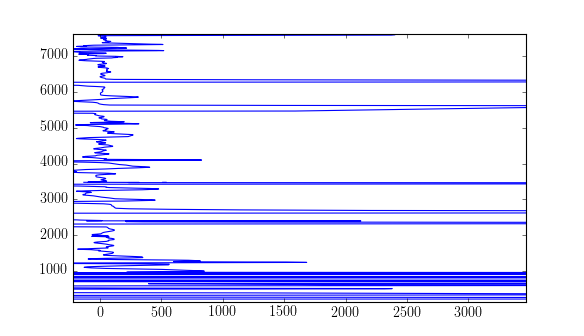

In [162]:
plt.figure()
plt.plot(s['ext'][it,400],s['Alt'][it])

<IPython.core.display.Javascript object>


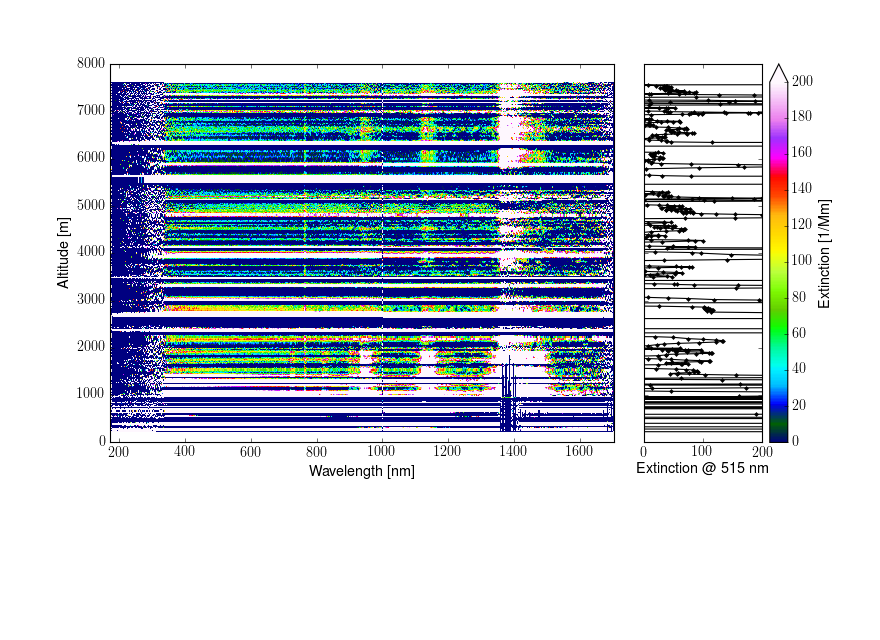

In [170]:
fig = plt.figure(figsize=(11,8))
ax = plt.subplot2grid((4,4),(0,0),colspan=3,rowspan=3)
cb = ax.pcolorfast(s['w'].flatten()*1000.0,s['Alt'][it].flatten(),s['ext'][it,:][:-1,:-1],
                   cmap='gist_ncar',vmin=0,vmax=200.0)
ax2 = plt.subplot2grid((4,4),(0,3),sharey=ax,rowspan=3)
ax2.plot(s['ext'][it,i515],s['Alt'][it],'k.-')
axc = plt.colorbar(cb,extend='max')
axc.set_label('Extinction [1/Mm]')
ax.set_ylabel('Altitude [m]')
ax.set_xlabel('Wavelength [nm]')
ax.set_ylim([0,8000])
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_xticks([0.0,100.0,200.0])
ax2.set_xlim([0.0,200.0])
ax2.set_xlabel('Extinction @ 515 nm')

#ax3 = plt.subplot2grid((4,4),(3,0),sharex=ax,colspan=3)
#ax3.plot(s['w'].flatten()*1000.0,s['ext'][ii,:].flatten())
#ax.set_xlim([350,1650])
#ax3.set_ylim([0,200.0])
#ax3.grid()
#ax3.set_xlabel('Wavelength [nm]')
#ax3.set_ylabel('AOT')
#plt.setp(ax.get_xticklabels(), visible=False)
plt.savefig(fp+'plot\\Ext_Alt_profile_20160501.png',dpi=600,transparent=True)

In [178]:
s.keys()

['Str',
 'tau_O3_err',
 'sza',
 'm_ray',
 'toggle',
 'pitch',
 'Tst',
 'fwhm',
 'nirt',
 'tau_aero_noscreening',
 'rateaero',
 'O3h',
 'NO2col',
 'Headng',
 'RH',
 'Pst',
 'nirheader',
 'sd_aero_crit',
 'dark',
 'nirVdettemp',
 'Elstep',
 'tau_ray',
 'nircols',
 'sunaz',
 'O3col',
 'nirfilen',
 'f',
 'tau_O4_err',
 't',
 'c0mod',
 'tau_tot_slant',
 'rate',
 'program_version',
 'sat_time',
 'm_O3',
 'visheader',
 'nirTint',
 'filename',
 'tau_r_err',
 'nirsat_pixel',
 'Md',
 'aeronetcols',
 'rateslant',
 'visAVG',
 'tau_NO2_err',
 'Zn',
 'AZstep',
 'darkstd',
 'QdVtot',
 'nirAVG',
 'w',
 'ELcorr',
 'visVdettemp_C',
 'El_deg',
 'skyresp',
 'Lon',
 'tau_aero',
 'AZ_deg',
 'visrow_labels',
 'm_H2O',
 'c0err',
 'viscols',
 'tau_CO2_CH4_N2O_abserr',
 'aerosolcols',
 'tau_O3',
 'vissat_pixel',
 'tau_O4',
 'tau_NO2',
 'tau_aero_polynomial',
 'ratetot',
 'visfilen',
 'c0',
 'utc',
 'Tprecon_C',
 'raw',
 '__header__',
 'rawcorr',
 'sat_ij',
 'sunel',
 'visTint',
 'Tbox_C',
 'QdVtb',
 'QdVlr',
 '

In [183]:
s['O3col']

array([[ 0.327]])

In [179]:
s['tau_aero_noscreening']

array([[ array([u'VIS and NIR data were combined with starwrapper.m. '], 
      dtype='<U51')],
       [array([u'NIR notes: '], 
      dtype='<U11')],
       [ array([u'Consolidated on 2016-05-03 09:16:12 using allstarmat.m.'], 
      dtype='<U55')],
       [ array([u'See starinfo_20160501.m for additional info. '], 
      dtype='<U45')],
       [ array([u'Wavelengths and FWHM as derived at GSFC in 2013; see wl_20130605.txt.'], 
      dtype='<U69')],
       [ array([u'C0 from 20160426_VIS_C0_refined_Langley_korusaq_transit1_v1.dat.'], 
      dtype='<U64')],
       [ array([ u'Resp from 20150915_VIS_SKY_Resp_from_20150915_012_VIS_park_with_20140606091700HISS.dat.'], 
      dtype='<U87')],
       [ array([u'Darks averaged over nearest (before and after) dark measurement blocks.'], 
      dtype='<U71')],
       [array([u'VIS notes: '], 
      dtype='<U11')],
       [ array([ u'Wavelengths from Lambda the manufacturer. FWHM from 4STAR_FWHM_fits_from_monoscan_27.mat.'], 
      dtype='<U89')